(784,)


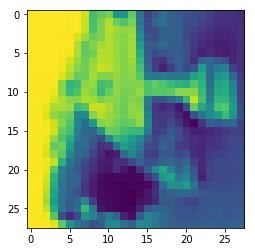

In [1]:
import scipy.io
mat = scipy.io.loadmat('data/objects-train.mat')

import matplotlib.pyplot as plt
import numpy as np
x = np.array(mat['images_train'][:,0])
print(x.shape)
plt.imshow(x.reshape(28,28))
plt.show()

In [2]:
feat = mat['fea_hog_train']

In [3]:
from sklearn.metrics.cluster import supervised
from scipy.optimize import linear_sum_assignment

def accuracy(labels_true, labels_pred):
    labels_true, labels_pred = supervised.check_clusterings(labels_true, labels_pred)
    # labels_true : int array with ground truth labels, shape = [n_samples]
    # labels_pred : int array with estimated labels, shape = [n_samples]
    value = supervised.contingency_matrix(labels_true, labels_pred)
    # value : array of shape [n, n] whose (i, j)-th entry is the number of samples in true class i and in predicted class j
    [r, c] = linear_sum_assignment(-value)
    return value[r, c].sum() / len(labels_true)

In [4]:
accuracy([2]*10,[1]*10)

1.0

In [5]:
np.reshape(mat['labels_train'],-1).shape

(5000,)

In [6]:
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import numpy as np

kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit_predict(np.transpose(feat))
accuracy(kmeans, np.reshape(mat['labels_train'],-1))

0.36080000000000001

In [7]:

kmeans = sklearn.cluster.SpectralClustering(n_clusters=5).fit_predict(np.transpose(feat))
accuracy(kmeans, np.reshape(mat['labels_train'],-1))

0.24540000000000001

In [8]:

kmeans = sklearn.cluster.Birch(n_clusters=5).fit_predict(np.transpose(feat))
accuracy(kmeans, np.reshape(mat['labels_train'],-1))

0.41899999999999998

In [9]:
import sklearn.mixture
for g in ['full', 'tied', 'diag', 'spherical']:
    accs = []
    for _ in range(5):
        gmm = sklearn.mixture.GaussianMixture(n_components=5, covariance_type=g, max_iter=100).fit(np.transpose(feat))
        kmeans = gmm.predict(np.transpose(feat))
        accs.append(accuracy(kmeans, np.reshape(mat['labels_train'],-1)))
    print(g, ': ', np.mean(accs), '+/-', np.std(accs))

full :  0.37752 +/- 0.0126810725098
tied :  0.321 +/- 0.028195602494
diag :  0.39932 +/- 0.00974112929798
spherical :  0.37432 +/- 0.01413002477


In [10]:
import tensorflow